## Setting up the environment

In [ ]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read in the data
df = pd.read_csv('framingham.csv')
df.head()

,Male,Age,Education,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
0,1,39,College,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,High school/GED,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,Some high school,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,Some college/vocational school,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,Some college/vocational school,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [ ]:
# Understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Male             3658 non-null   int64  
 1   Age              3658 non-null   int64  
 2   Education        3658 non-null   object 
 3   CurrentSmoker    3658 non-null   int64  
 4   CigsPerDay       3658 non-null   int64  
 5   BPMeds           3658 non-null   int64  
 6   PrevalentStroke  3658 non-null   int64  
 7   PrevalentHyp     3658 non-null   int64  
 8   Diabetes         3658 non-null   int64  
 9   TotChol          3658 non-null   int64  
 10  SysBP            3658 non-null   float64
 11  DiaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  HeartRate        3658 non-null   int64  
 14  Glucose          3658 non-null   int64  
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 457.4+ KB


## Data Pre-Processing

We identified there is one categorical variable, which we one hot encoded before training any model

In [ ]:
# Perform One-Hot Encoding to process categorical data and drop a 'base' feature
pd.get_dummies(df, columns=['Education'], drop_first=True)

,Male,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD,Education_High school/GED,Education_Some college/vocational school,Education_Some high school
0,1,39,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,0,0,0
1,0,46,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,1,0,0
2,1,48,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,0,0,1
3,0,61,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1,0,1,0
4,0,46,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1,50,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1,0,0,1
3654,1,51,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0,0,1,0
3655,0,52,0,0,0,0,0,0,269,133.5,83.0,21.47,80,107,0,1,0,0
3656,1,40,0,0,0,0,1,0,185,141.0,98.0,25.60,67,72,0,0,1,0


In [ ]:
# Update the dataframe
df = pd.get_dummies(df, columns=['Education'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Male                                      3658 non-null   int64  
 1   Age                                       3658 non-null   int64  
 2   CurrentSmoker                             3658 non-null   int64  
 3   CigsPerDay                                3658 non-null   int64  
 4   BPMeds                                    3658 non-null   int64  
 5   PrevalentStroke                           3658 non-null   int64  
 6   PrevalentHyp                              3658 non-null   int64  
 7   Diabetes                                  3658 non-null   int64  
 8   TotChol                                   3658 non-null   int64  
 9   SysBP                                     3658 non-null   float64
 10  DiaBP                               

In [ ]:
# Put all the features into a variable called X and dependent variable into Y
features = [
 'Male',
 'Age',
 'CurrentSmoker',
 'CigsPerDay',
 'BPMeds',
 'PrevalentStroke',
 'PrevalentHyp',
 'Diabetes',
 'TotChol',
 'SysBP',
 'DiaBP',
 'BMI',
 'HeartRate',
 'Glucose',
 'Education_High school/GED',
 'Education_Some college/vocational school',
 'Education_Some high school'
]
x = df[features]
y = df['TenYearCHD']

In [ ]:
# Split the data into train and test sets with 70/30 proportions
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, stratify=y, random_state=144)

In [ ]:
# Standardize the independent variables
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Test if stratification worked by testing the mean
print(y_train.mean())
print(y_test.mean())

0.15234375
0.15209471766848817


# Exercise 2.1

## (a)

In [ ]:
# Train a logistic regression model
lrm = LogisticRegression(penalty='none',max_iter=10000)

# Fitting the model and checking the coefficients
lrm.fit(x_train_scaled,y_train)
lrm.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


array([[ 0.27801451,  0.56442963,  0.04247807,  0.23891947,  0.03515575,
         0.10387357,  0.05334545, -0.0057148 ,  0.07422883,  0.39639633,
        -0.05075345,  0.03751014,  0.0082462 ,  0.09371067, -0.05425931,
        -0.07250105,  0.04277778]])

In [ ]:
# Predicting values for AUC
y_pred = lrm.predict_proba(x_test_scaled)[:,1]
print(y_pred)

[0.0874658  0.15897024 0.10817734 ... 0.51703813 0.069177   0.03507352]


In [ ]:
# Checking the model performance with out-of-sample AUC
roc_auc_score(y_test,y_pred)

0.7224219659499476

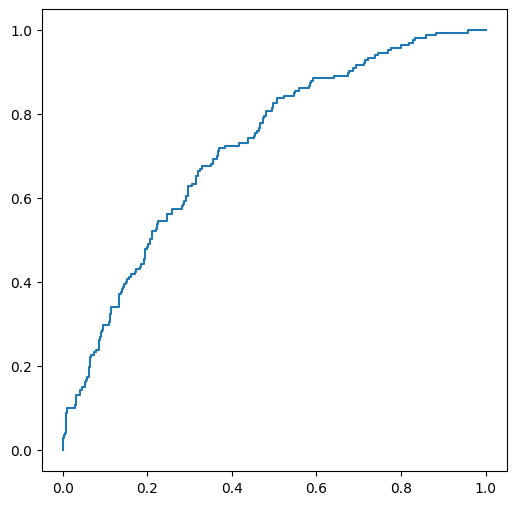

In [ ]:
#Plotting ROC-Curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)

## (b)

In [ ]:
# Train a logistic regression model with L1 Regularization (LASSO)
lrm_l1 = LogisticRegressionCV(penalty='l1', Cs = [1,10,100], cv = 5, solver = 'liblinear')

# Fitting the model
lrm_l1.fit(x_train_scaled, y_train)

# Checking the coefficients
coefficients_l1 = lrm_l1.coef_

print("Coefficients with L1 regularization:")
print(coefficients_l1)

Coefficients with L1 regularization:
[[ 0.27742463  0.56414751  0.04200122  0.23888304  0.03500283  0.10364788
   0.0531062  -0.00496022  0.07390353  0.39502927 -0.04904365  0.03702194
   0.00793793  0.0930821  -0.05339123 -0.07165368  0.04332685]]


In [ ]:
# Predicting values for AUC
y_pred_l1 = lrm_l1.predict_proba(x_test_scaled)[:,1]
print(y_pred_l1)

[0.0875077  0.15860041 0.10836526 ... 0.51622745 0.06930759 0.03517073]


In [ ]:
# Checking the model performance with out-of-sample AUC
roc_auc_score(y_test,y_pred_l1)

0.7223705113939682

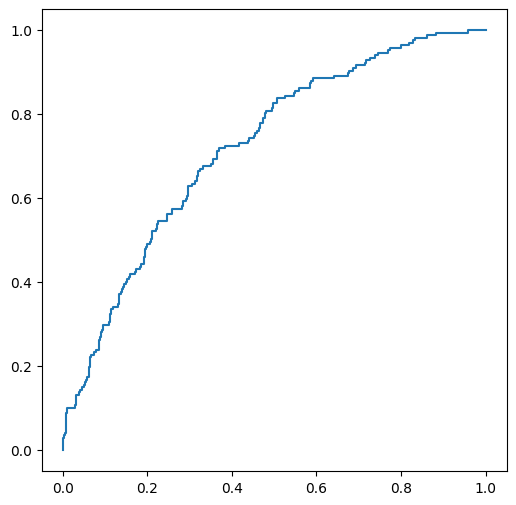

In [ ]:
#Plotting ROC-Curve
fprl1, tprl1, thresholds = roc_curve(y_test,y_pred_l1)
plt.figure(figsize=(6,6))
plt.plot(fprl1,tprl1)

## (c)

In [ ]:
# Train a logistic regression model with L2 Regularization (Ridge)
lrm_l2 = LogisticRegressionCV(penalty='l2', Cs = [1,10,100], cv = 5, solver = 'liblinear')

# Fitting the model
lrm_l2.fit(x_train_scaled, y_train)

# Checking the coefficients
coefficients_l2 = lrm_l2.coef_

print("Coefficients with L1 regularization:")
print(coefficients_l2)

Coefficients with L1 regularization:
[[ 0.27517734  0.55948098  0.04304059  0.2362403   0.03533966  0.10347643
   0.05392589 -0.00520654  0.07336719  0.39184831 -0.04855432  0.03706173
   0.00822058  0.09318255 -0.05337984 -0.07135554  0.04357228]]


In [ ]:
# Predicting values for AUC
y_pred_l2 = lrm_l2.predict_proba(x_test_scaled)[:,1]
print(y_pred_l2)

[0.0883217  0.15966471 0.10935533 ... 0.51568301 0.07045892 0.03580064]


In [ ]:
# Checking the model performance with out-of-sample AUC
roc_auc_score(y_test,y_pred_l2)

0.7223898068524606

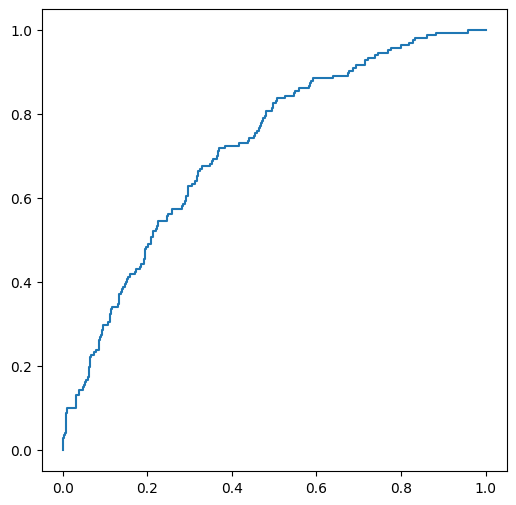

In [ ]:
#Plotting ROC-Curve
fprl2, tprl2, thresholds = roc_curve(y_test,y_pred_l2)
plt.figure(figsize=(6,6))
plt.plot(fprl2,tprl2)

## (d)

In [ ]:
# Train a Decision Tree
log_dt = DecisionTreeClassifier()
log_dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting values for AUC
y_pred_dt = log_dt.predict_proba(x_test_scaled)[:,1]
y_pred_dt

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
# Checking the model performance with out-of-sample AUC
roc_auc_score(y_test,y_pred_dt)

0.5740559696932667

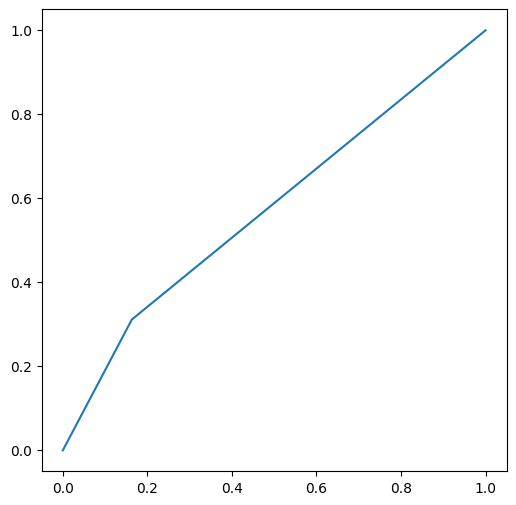

In [ ]:
#Plotting ROC-Curve
fprdt, tprdt, thresholds = roc_curve(y_test,y_pred_dt)
plt.figure(figsize=(6,6))
plt.plot(fprdt,tprdt)

The area under the ROC curves for all the 4 models are as follows:
1. Logistic regression: 0.7224219659499476
2. Logistic regression with L1 reguralization: 0.7223705113939682
3. Logistic regression with L2 reguralization: 0.7223898068524606
4. Decision Tree: 0.5718273442374112

The more is the area under the curve, the better is the model, since it maximizes both true positive rate and
true negetive rate. Basically AUC ROC score = 1 means a perfectly fitting model, with TPR=TNR=1. For our data
out of the above 4 models, logistic regression with no regularization gives the highest AUC ROC of 0.7224

# 2.2

## (a)

In [ ]:
# Train a Decision Tree
log_dt2 = DecisionTreeClassifier(max_depth=3)
log_dt2.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3)

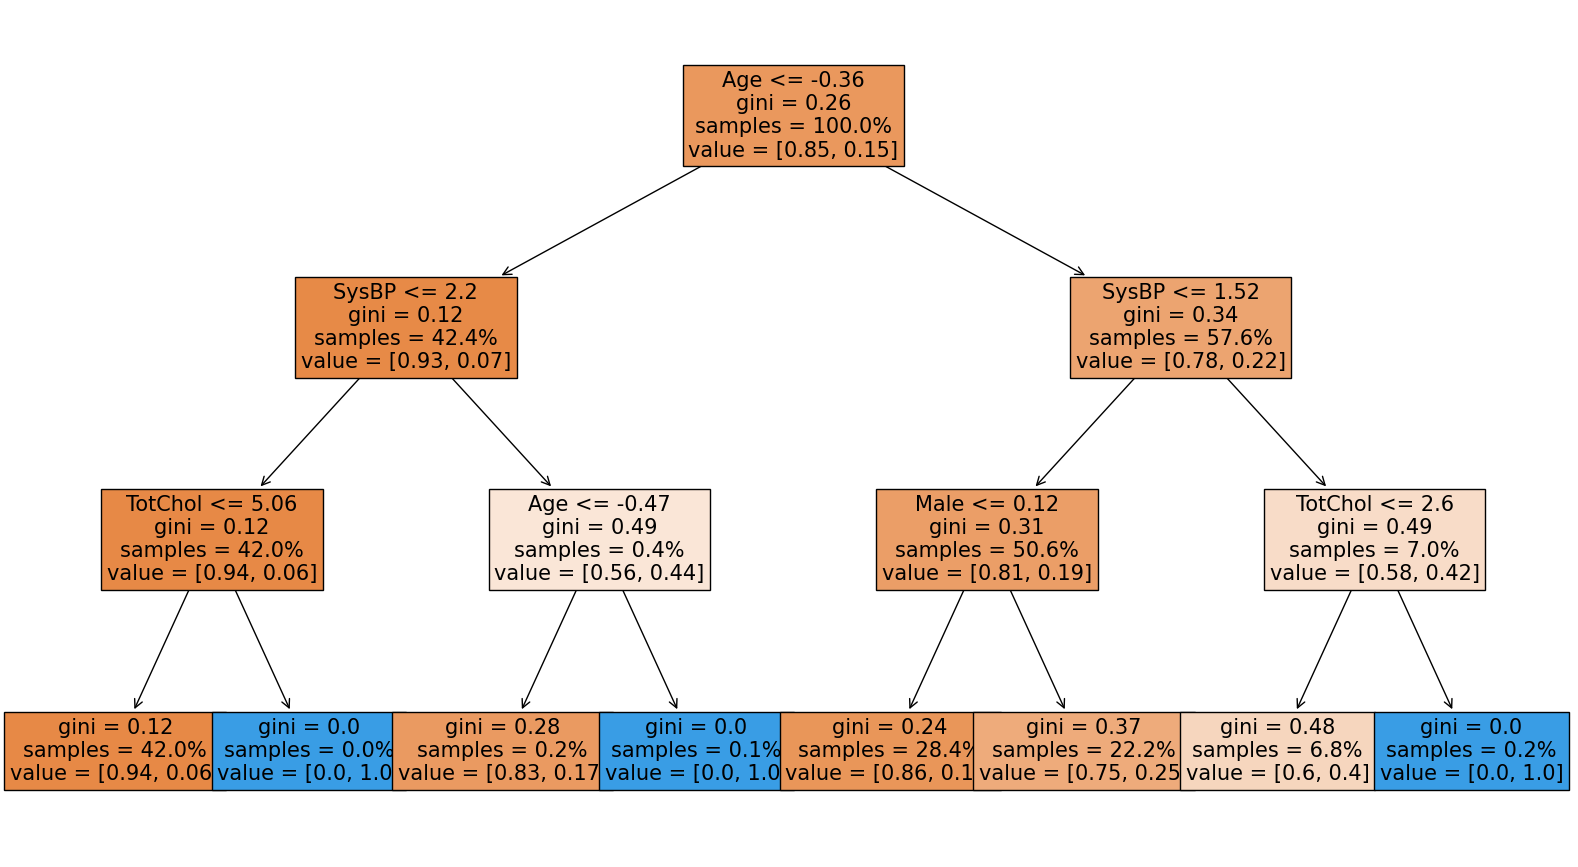

In [ ]:
# Plot Decision Tree
plt.figure(figsize=(20,11))
plot_tree(log_dt2, feature_names=features, filled=True, fontsize=15, proportion=True, precision=2)
plt.show()

## (b)

In [ ]:
# Predicting values for AUC
y_pred_dt2 = log_dt2.predict_proba(x_test_scaled)[:,1]
y_pred_dt2

array([0.06139535, 0.14030261, 0.14030261, ..., 0.40229885, 0.06139535,
       0.06139535])

In [ ]:
# Checking the model performance with out-of-sample AUC
roc_auc_score(y_test,y_pred_dt2)

0.6674717160737601

## (c)

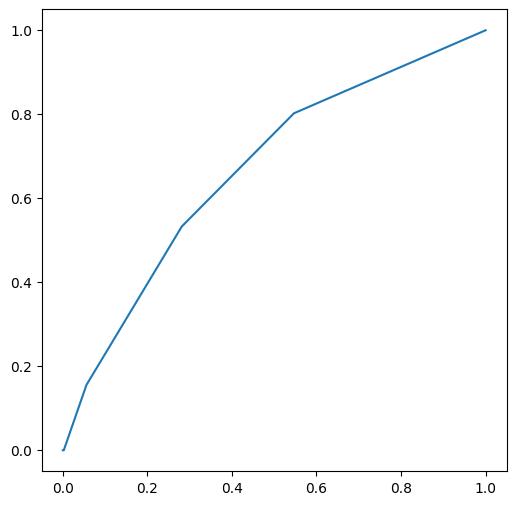

In [ ]:
#Plotting ROC-Curve
fprdt2, tprdt2, thresholds = roc_curve(y_test,y_pred_dt2)
plt.figure(figsize=(6,6))
plt.plot(fprdt2,tprdt2)

## (d)

0.5329341317365269


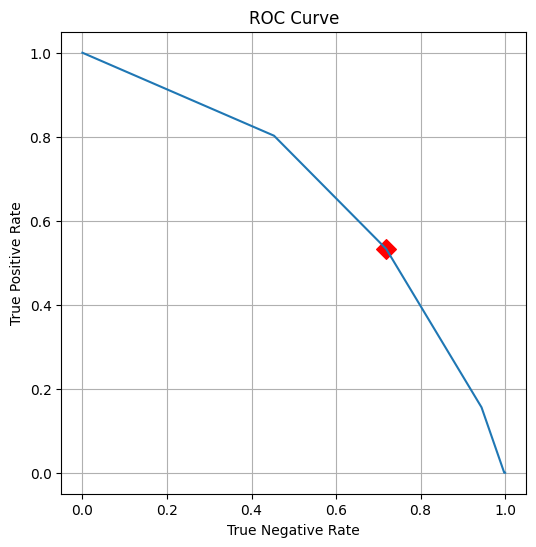

In [ ]:
# Getting the highest achievable True Positive Rate if we require a True Negative Rate of at least 60%.
tnrdt2 = 1 -fprdt2
best_tpr = max(tprdt2[tnrdt2>=0.6])
print(best_tpr)

plt.figure(figsize=(6,6))
plt.plot(tnrdt2,tprdt2)

plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.scatter(tnrdt2[3], tprdt2[3], c='red', marker='D', s=100);

plt.show()

Looking at the chart above, we see that we can achieve a maximum of roughly 0.5329 or 53.29% true positive rate if we require a true negative rate of at least 60%.

We also tried to plot a graph of TNR vs TPR to visualize the maximum True Positive Rate for with the True
Negetive Rate is at least 0.6. The first such point comes as we can see in the graph at TPR=0.5329341317365269